# Week 8 Assessment
### Jeremy Garrison, Jesse Noss, Kendra Johnson

#### ETL

We imported several different plotting packages, and imported all 4 datasets. In the end we decided to focus on the company summary and owner characteristic datasets, but the code for the other two is still included.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import random
import requests


company_summary_url = "https://api.census.gov/data/2018/abscs?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,EMPSZFI,EMPSZFI_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,RCPPDEMP,RCPPDEMP_F,EMP,EMP_F,PAYANN,PAYANN_F,FIRMPDEMP_S,FIRMPDEMP_S_F,RCPPDEMP_S,RCPPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F&for=us:*"
# business_char_url = "https://api.census.gov/data/2018/abscb?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,QDESC,QDESC_LABEL,BUSCHAR,BUSCHAR_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,FIRMPDEMP_PCT,FIRMPDEMP_PCT_F,RCPPDEMP,RCPPDEMP_F,RCPPDEMP_PCT,RCPPDEMP_PCT_F,EMP,EMP_F,EMP_PCT,EMP_PCT_F,PAYANN,PAYANN_F,PAYANN_PCT,PAYANN_PCT_F,FIRMPDEMP_S,FIRMPDEMP_S_F,FIRMPDEMP_PCT_S,FIRMPDEMP_PCT_S_F,RCPPDEMP_S,RCPPDEMP_S_F,RCPPDEMP_PCT_S,RCPPDEMP_PCT_S_F,EMP_S,EMP_S_F,EMP_PCT_S,EMP_PCT_S_F,PAYANN_S,PAYANN_S_F,PAYANN_PCT_S,PAYANN_PCT_S_F&for=us:*"
owner_char_url = "https://api.census.gov/data/2018/abscbo?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,OWNER_SEX,OWNER_SEX_LABEL,OWNER_ETH,OWNER_ETH_LABEL,OWNER_RACE,OWNER_RACE_LABEL,OWNER_VET,OWNER_VET_LABEL,QDESC,QDESC_LABEL,OWNCHAR,OWNCHAR_LABEL,YEAR,OWNPDEMP,OWNPDEMP_F,OWNPDEMP_PCT,OWNPDEMP_PCT_F,OWNPDEMP_S,OWNPDEMP_S_F,OWNPDEMP_PCT_S,OWNPDEMP_PCT_S_F&for=us:*"
# tech_char_url = "https://api.census.gov/data/2018/abstcb?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,NSFSZFI,NSFSZFI_LABEL,FACTORS_P,FACTORS_P_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,FIRMPDEMP_PCT,FIRMPDEMP_PCT_F,RCPPDEMP,RCPPDEMP_F,RCPPDEMP_PCT,RCPPDEMP_PCT_F,EMP,EMP_F,EMP_PCT,EMP_PCT_F,PAYANN,PAYANN_F,PAYANN_PCT,PAYANN_PCT_F,FIRMPDEMP_S,FIRMPDEMP_S_F,FIRMPDEMP_PCT_S,FIRMPDEMP_PCT_S_F,RCPPDEMP_S,RCPPDEMP_S_F,RCPPDEMP_PCT_S,RCPPDEMP_PCT_S_F,EMP_S,EMP_S_F,EMP_PCT_S,EMP_PCT_S_F,PAYANN_S,PAYANN_S_F,PAYANN_PCT_S,PAYANN_PCT_S_F&for=us:*"


company_response = requests.get(company_summary_url)
# business_char_response = requests.get(business_char_url)
owner_char_response = requests.get(owner_char_url)
# tech_char_response = requests.get(tech_char_url)

Using .json() we created pandas dataframes for these databases

In [2]:
company_data = company_response.json()
# business_data = business_char_response.json()
owner_data = owner_char_response.json()
# tech_data = tech_char_response.json()

company_col = company_data[0]
# business_col = business_data[0]
owner_col = owner_data[0]
# tech_col = tech_data[0]

company_df = pd.DataFrame(company_data[1:], columns=company_col)
# business_df = pd.DataFrame(business_data[1:], columns=business_col)
owner_df = pd.DataFrame(owner_data[1:], columns=owner_col)
# tech_df = pd.DataFrame(tech_data[1:], columns=tech_col)

After reviewing the data, we decided to drop these columns, as they had duplicate or irrelevant info.

In [4]:
company_df = company_df.drop(['GEO_ID','NAICS2017','SEX','ETH_GROUP','RACE_GROUP','VET_GROUP','EMPSZFI','FIRMPDEMP_F','RCPPDEMP_F','EMP_F','PAYANN_F','FIRMPDEMP_S_F','RCPPDEMP_S_F','EMP_S_F','PAYANN_S_F','us'],axis=1)
company_df.head()

,NAME,NAICS2017_LABEL,SEX_LABEL,ETH_GROUP_LABEL,RACE_GROUP_LABEL,VET_GROUP_LABEL,EMPSZFI_LABEL,YEAR,FIRMPDEMP,RCPPDEMP,EMP,PAYANN,FIRMPDEMP_S,RCPPDEMP_S,EMP_S,PAYANN_S
0,United States,Total for all sectors,Female,Hispanic,Total,Total,All firms,2018,84496,91103725,722654,21975675,3.0,8.9,7.7,7.0
1,United States,Total for all sectors,Female,Hispanic,Total,Total,Firms with no employees,2018,10036,3233978,0,499996,4.7,19.2,0.0,13.5
2,United States,Total for all sectors,Female,Hispanic,Total,Total,Firms with 1 to 4 employees,2018,47105,15792524,92631,2808773,4.7,8.2,4.8,7.4
3,United States,Total for all sectors,Female,Hispanic,Total,Total,Firms with 5 to 9 employees,2018,12523,10688294,83449,2601817,5.9,4.3,5.6,6.3
4,United States,Total for all sectors,Female,Hispanic,Total,Total,Firms with 10 to 19 employees,2018,8516,14105603,116479,3506384,6.0,16.2,6.7,10.7


In [5]:
# business_df = business_df.drop(['GEO_ID','NAICS2017','SEX','ETH_GROUP','RACE_GROUP','VET_GROUP','QDESC','BUSCHAR','FIRMPDEMP_F','FIRMPDEMP_PCT_F','RCPPDEMP_F','RCPPDEMP_PCT_F','EMP_F','EMP_PCT_F','PAYANN_F','PAYANN_PCT_F','FIRMPDEMP_S_F','FIRMPDEMP_PCT_S_F','RCPPDEMP_S_F','RCPPDEMP_PCT_S_F','EMP_S_F','EMP_PCT_S_F','PAYANN_S_F','PAYANN_PCT_S_F','us'],axis=1)
# business_df.head()

In [6]:
owner_df = owner_df.drop(['GEO_ID','NAICS2017','OWNER_SEX','OWNER_ETH','OWNER_RACE','OWNER_VET','QDESC','OWNCHAR','OWNPDEMP_F','OWNPDEMP_PCT_F','OWNPDEMP_S_F','OWNPDEMP_PCT_S_F','us'],axis=1)
owner_df.head()

,NAME,NAICS2017_LABEL,OWNER_SEX_LABEL,OWNER_ETH_LABEL,OWNER_RACE_LABEL,OWNER_VET_LABEL,QDESC_LABEL,OWNCHAR_LABEL,YEAR,OWNPDEMP,OWNPDEMP_PCT,OWNPDEMP_S,OWNPDEMP_PCT_S
0,United States,Total for all sectors,All owners of respondent firms,All owners of respondent firms,Black or African American,All owners of respondent firms,YRACQBUS,2013 to 2017,2018,21939,29.9,5.1,1.2
1,United States,Total for all sectors,All owners of respondent firms,All owners of respondent firms,Black or African American,All owners of respondent firms,YRACQBUS,2018,2018,912,1.2,20.3,0.3
2,United States,Total for all sectors,All owners of respondent firms,All owners of respondent firms,Black or African American,All owners of respondent firms,YRACQBUS,Don't know,2018,7441,10.1,4.2,0.5
3,United States,Total for all sectors,All owners of respondent firms,All owners of respondent firms,Black or African American,All owners of respondent firms,YRACQBUS,Total reporting,2018,73427,100.0,2.1,0.0
4,United States,Total for all sectors,All owners of respondent firms,All owners of respondent firms,Black or African American,All owners of respondent firms,YRACQBUS,Item not reported,2018,3106,0.0,5.2,0.0


In [7]:
# tech_df = tech_df.drop(['GEO_ID','NAICS2017','SEX','ETH_GROUP','RACE_GROUP','VET_GROUP','NSFSZFI','FACTORS_P','FIRMPDEMP_F','FIRMPDEMP_PCT_F','RCPPDEMP_F','RCPPDEMP_PCT_F','EMP_F','EMP_PCT_F','PAYANN_F','PAYANN_PCT_F','FIRMPDEMP_S_F','FIRMPDEMP_PCT_S_F','RCPPDEMP_S_F','RCPPDEMP_PCT_S_F','EMP_S_F','EMP_PCT_S_F','PAYANN_S_F','PAYANN_PCT_S_F','us'],axis=1)
# tech_df.head()

## My visualizations
### Tree map showing which sectors have companies owned by male/females
### Violin plot showing the firm sizes between male/female
### Scatterplot showing the relationship between number of employees and annual revenue

### =====================================================================

### Tree Map

In [8]:
treemap_df = company_df.groupby(['NAICS2017_LABEL','SEX_LABEL']).size().reset_index(name='count')
treemap_df = treemap_df.loc[~treemap_df["SEX_LABEL"].str.contains("Classifiable")]
treemap_df = treemap_df.loc[~treemap_df["SEX_LABEL"].str.contains("Unclassifiable")]
treemap_df = treemap_df.loc[~treemap_df["SEX_LABEL"].str.contains("Total")]
treemap_df = treemap_df.loc[~treemap_df["SEX_LABEL"].str.contains("Equally male/female")]
treemap_df = treemap_df.loc[~treemap_df["NAICS2017_LABEL"].str.contains('Total for all sectors')]
treemap_df = treemap_df.replace('Administrative and support and waste management and remediation services','Administrative and support<br> and waste management<br> and remediation services')
treemap_df = treemap_df.replace('Professional, scientific, and technical services','Professional,<br>scientific,<br>and technical services')
treemap_df = treemap_df.replace('Transportation and warehousing','Transportation<br>and warehousing')
treemap_df = treemap_df.replace('Accommodation and food services','Accommodation<br>and food services')
treemap_df = treemap_df.replace('Health care and social assistance','Health care<br>and social assistance')
treemap_df = treemap_df.replace('Real estate and rental and leasing','Real estate and<br>rental and leasing')
treemap_df = treemap_df.replace('Arts, entertainment, and recreation','Arts, entertainment,<br>and recreation')
treemap_df = treemap_df.replace('Management of companies and enterprises','Management of companies<br>and enterprises')
treemap_df = treemap_df.replace('Other services (except public administration)','Other services<br>(except public administration)')
treemap_df = treemap_df.replace('Mining, quarrying, and oil and gas extraction','Mining, quarrying,<br>and oil and gas extraction')
treemap_df = treemap_df.replace('Agriculture, forestry, fishing and hunting','Agriculture, forestry,<br>fishing and hunting')

In [9]:
treemap_df['NAICS2017_LABEL'].unique()

array(['Accommodation<br>and food services',
       'Administrative and support<br> and waste management<br> and remediation services',
       'Agriculture, forestry,<br>fishing and hunting',
       'Arts, entertainment,<br>and recreation', 'Construction',
       'Educational services', 'Finance and insurance',
       'Health care<br>and social assistance',
       'Industries not classified', 'Information',
       'Management of companies<br>and enterprises', 'Manufacturing',
       'Mining, quarrying,<br>and oil and gas extraction',
       'Other services<br>(except public administration)',
       'Professional,<br>scientific,<br>and technical services',
       'Real estate and<br>rental and leasing', 'Retail trade',
       'Transportation<br>and warehousing', 'Utilities',
       'Wholesale trade'], dtype=object)

In [10]:
tree = px.treemap(treemap_df, path=['SEX_LABEL','NAICS2017_LABEL'],values='count',
color = 'count',
width = 1400,
height = 700
# textinfo = "label+value+percent"
)

tree.show()

### Violin Plot

In [11]:
violin_df = company_df[~company_df['SEX_LABEL'].isin(['Total', 'Classifiable', 'Unclassifiable','Equally male/female'])]
violin_df = violin_df.loc[~violin_df["EMPSZFI_LABEL"].str.contains('All')]
labels = {'SEX_LABEL': 'Sex', 'EMPSZFI_LABEL': 'Firm number of employees'}
order = {'SEX_LABEL': ['Male','Female'], 
        'EMPSZFI_LABEL': ['Firms with 500 employees or more',
        'Firms with 250 to 499 employees',
        'Firms with 100 to 249 employees',
        'Firms with 50 to 99 employees',
        'Firms with 20 to 49 employees',
        'Firms with 10 to 19 employees',
        'Firms with 5 to 9 employees',
        'Firms with 1 to 4 employees',
        'Firms with no employees']}

In [12]:
violin_df['EMPSZFI_LABEL'].unique()

array(['Firms with no employees', 'Firms with 1 to 4 employees',
       'Firms with 5 to 9 employees', 'Firms with 10 to 19 employees',
       'Firms with 20 to 49 employees', 'Firms with 50 to 99 employees',
       'Firms with 100 to 249 employees',
       'Firms with 250 to 499 employees',
       'Firms with 500 employees or more'], dtype=object)

In [13]:
fig = px.violin(violin_df, 
y="EMPSZFI_LABEL", 
x="SEX_LABEL",
color="SEX_LABEL",
labels = labels,
category_orders = order)
fig.show()

### Scatter plot

True


C:\Users\jmgar\AppData\Local\Temp\ipykernel_19956\408436790.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jmgar\AppData\Local\Temp\ipykernel_19956\408436790.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jmgar\AppData\Local\Temp\ipykernel_19956\408436790.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

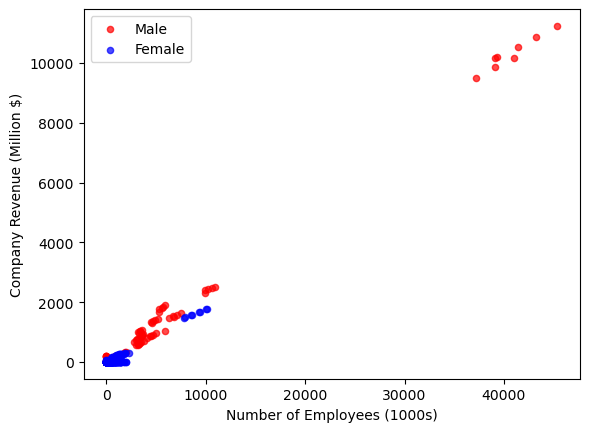

In [14]:
rev_per_employees = company_df[['RCPPDEMP', 'EMP','SEX_LABEL']]
rev_per_employees_m = rev_per_employees.loc[rev_per_employees['SEX_LABEL'] == 'Male']
rev_per_employees_f = rev_per_employees.loc[rev_per_employees['SEX_LABEL'] == 'Female']

rev_per_employees_m['RCPPDEMP'] = pd.to_numeric(rev_per_employees_m['RCPPDEMP']) /1000000
rev_per_employees_m['EMP'] = pd.to_numeric(rev_per_employees_m['EMP'])/1000
rev_per_employees_f['RCPPDEMP'] = pd.to_numeric(rev_per_employees_f['RCPPDEMP']) /1000000
rev_per_employees_f['EMP'] = pd.to_numeric(rev_per_employees_f['EMP'])/1000

rev_per_employees_m = rev_per_employees_m.loc[rev_per_employees_m['RCPPDEMP'] > 0]
rev_per_employees_m

ax_m = rev_per_employees_m.plot(kind='scatter', x='EMP', y='RCPPDEMP', label = 'Male', alpha =0.7, color='r')
ax_f = rev_per_employees_f.plot(kind='scatter', x='EMP', y='RCPPDEMP', label = 'Female', alpha =0.7, color='b', ax = ax_m)
ax_m.set_xlabel("Number of Employees (1000s)")
ax_m.set_ylabel("Company Revenue (Million $)")

print(ax_m==ax_f)